##            Unsupervised Machine Learning

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Author: Krishna Prajapati

In [16]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
# import the load_iris data sets
from sklearn.datasets import load_iris
iris=load_iris()
data_iris=iris.data
data_iris=pd.DataFrame(data_iris)
data_iris.columns=iris.feature_names
print("Iris Data has been loaded")
data_iris.head() # showing 5 rows

Iris Data has been loaded


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


###    Preparing the Datasets

In [19]:
data_iris.shape

(150, 4)

In [20]:
data_iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [21]:
data_iris.info() # To get the information of the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [23]:
data_iris.describe() # To describe the dataset statistically

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###   Using KMean(centroid) method
##### Finding the optimum number of clusters for k-means classification

In [24]:
#Training the Model by taking different no cluster ranging between 1 to 10 that will help us to find the Elbow point
from sklearn.cluster import KMeans
kmeans=[]
for i in range(1,10):
    KMNS=KMeans(n_clusters=i,random_state=0)
    KMNS.fit(data_iris)
    kmeans.append(KMNS.inertia_)
print("Training is completed")
kmeans   

Training is completed


[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25600931571815,
 46.44618205128204,
 39.03998724608725,
 34.299712121212146,
 30.014398496240617,
 28.03690635345049]

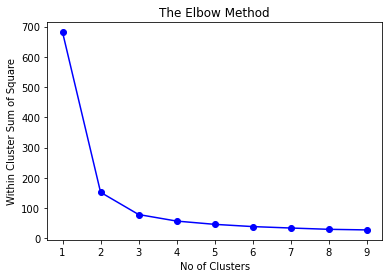

In [27]:
#To find the Elbow point by plotting the trained model
plt.plot(range(1,10),kmeans,color="blue",marker="o")
plt.xlabel("No of Clusters")
plt.ylabel("Within Cluster Sum of Square")
plt.title("The Elbow Method")
plt.show()

### From the above graph it is clearly seen that after 3rd no of cluster,graph is showing similar behaviour
###                                           No of Cluster=3 .

In [33]:
# Training the Model by taking no of cluster=3
KMNS=KMeans(n_clusters=3)
KMNS.fit(data_iris)
print("Training is completed")
x = data_iris.iloc[:, [0, 1, 2, 3]].values

labels=KMNS.predict(data_iris)
labels

Training is completed


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [34]:
KMNS.cluster_centers_  # To obtained the centroids of the clusters formed

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

###    Visualization of the Clusters

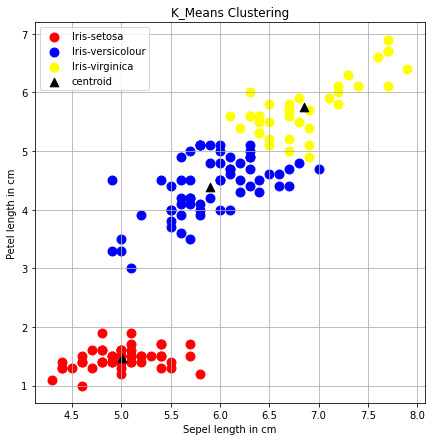

In [39]:

# Visualising the clusters - On the last two columns
plt.figure(figsize=(7,7))
plt.scatter(x[labels == 0, 0], x[labels == 0, 2], 
            s = 80, c = 'red', label = 'Iris-setosa')
plt.scatter(x[labels == 1, 0], x[labels == 1, 2], 
            s = 80, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[labels == 2, 0], x[labels == 2, 2],
            s = 80, c = 'yellow', label = 'Iris-virginica')
plt.xlabel("Sepel length in cm")
plt.ylabel("Petel length in cm")
plt.title("K_Means Clustering")

#Plotting the centroids of the clusters
ctn=KMNS.cluster_centers_
plt.scatter(ctn[:,0],ctn[:,2],marker="^",color="black",s=75,label="centroid")
plt.grid()
plt.legend()
plt.show()

## Thankyou 